**Design a program to analyze extensive transactional data employing Graph Analytics, and generate Data Visualization reports encompassing components like Lists, Crosstabs, Statistics, Charts, Maps, Data Grouping & Sorting, Filtering Reports, Adding Calculations to Reports, Conditional Formatting, and Adding Summary Lines to Reports. Additionally, enable functionalities to Run or Schedule reports, and support various output formats such as PDF, Excel, CSV, XML, etc.**

Dataset Used: Iris dataset

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [2]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [3]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [4]:
# Cross-tabs
crosstab = pd.crosstab(df['target'], df['sepal length (cm)'])
print(crosstab)

sepal length (cm)  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.0  5.1  5.2  ...  6.8  \
target                                                               ...        
0                    1    3    1    4    2    5    4    8    8    3  ...    0   
1                    0    0    0    0    0    0    1    2    1    1  ...    1   
2                    0    0    0    0    0    0    1    0    0    0  ...    2   

sepal length (cm)  6.9  7.0  7.1  7.2  7.3  7.4  7.6  7.7  7.9  
target                                                          
0                    0    0    0    0    0    0    0    0    0  
1                    1    1    0    0    0    0    0    0    0  
2                    3    0    1    3    1    1    1    4    1  

[3 rows x 35 columns]


**Visualization**

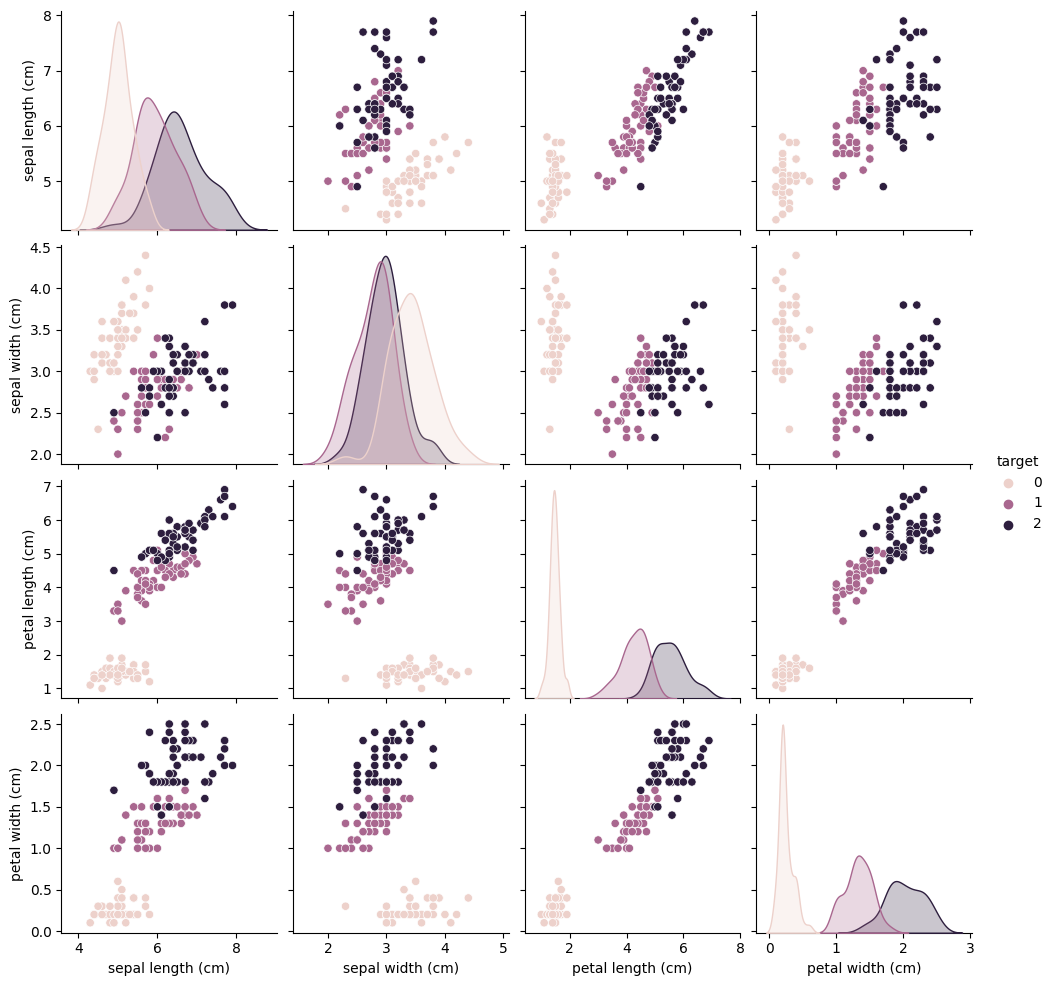

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical visualization
sns.pairplot(df, hue='target')
plt.show()


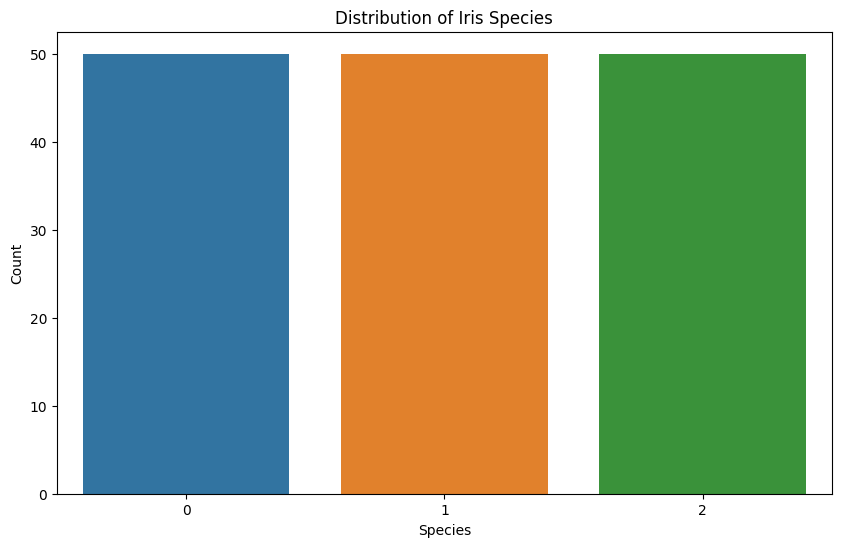

In [6]:
# Bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.savefig('bar_chart.pdf')  # Save bar chart to PDF
plt.show()

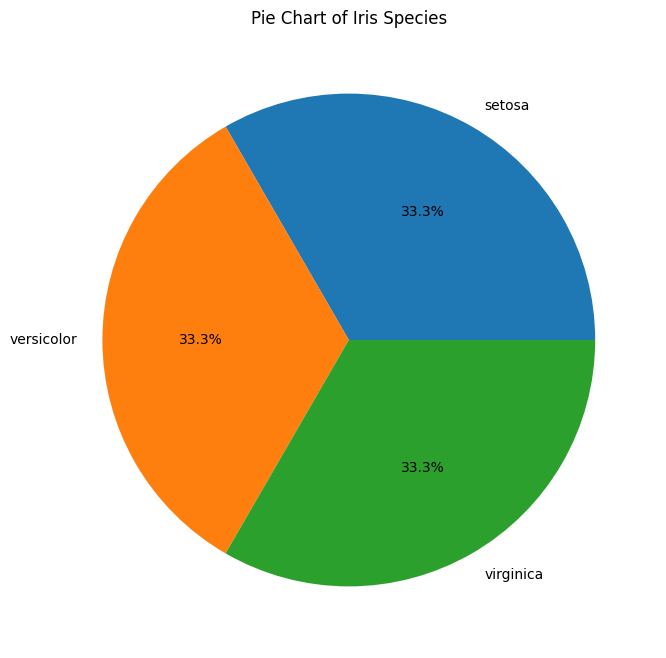

In [7]:
# Pie chart
plt.figure(figsize=(8, 8))
df['target'].value_counts().plot.pie(autopct='%1.1f%%', labels=iris.target_names)
plt.title('Pie Chart of Iris Species')
plt.ylabel('')
plt.savefig('pie_chart.pdf')  # Save pie chart to PDF
plt.show()

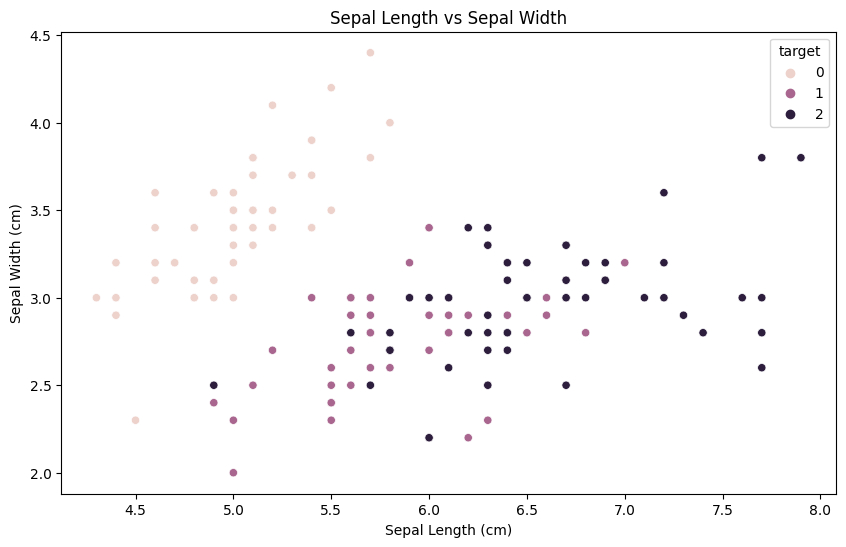

In [8]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.savefig('scatter_plot.pdf')  # Save scatter plot to PDF
plt.show()

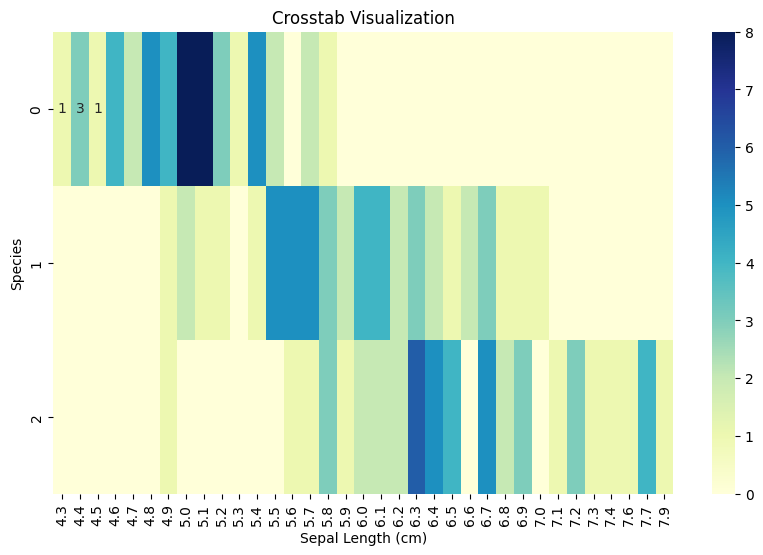

In [9]:
# Crosstab visualization
crosstab = pd.crosstab(df['target'], df['sepal length (cm)'])
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu')
plt.title('Crosstab Visualization')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Species')
plt.savefig('crosstab.pdf')  # Save crosstab visualization to PDF
plt.show()

In [10]:
# Data grouping and sorting
grouped_data = df.groupby('target').mean()
sorted_data = df.sort_values(by='sepal length (cm)')

# Filtering
filtered_data = df[df['sepal length (cm)'] > 5.0]


In [11]:
# Adding calculations
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']


In [12]:
summary_stats = df.groupby('target').agg(['mean', 'std', 'min', 'max'])


In [13]:
# Exporting to different formats
df.to_csv('iris_data.csv', index=False)
df.to_excel('iris_data.xlsx', index=False)
